In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("../input/diabetes-data-set/diabetes.csv")

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.shape

(768, 9)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data["Glucose"].nsmallest(10)

75      0
182     0
342     0
349     0
502     0
62     44
680    56
146    57
537    57
352    61
Name: Glucose, dtype: int64

In [15]:
data["BloodPressure"].nsmallest(10)

7      0
15     0
49     0
60     0
78     0
81     0
172    0
193    0
222    0
261    0
Name: BloodPressure, dtype: int64

In [16]:
data["Glucose"]=data["Glucose"].replace(0,np.nan)
data["BloodPressure"]=data["BloodPressure"].replace(0,np.nan)
data["SkinThickness"]=data["SkinThickness"].replace(0,np.nan)
data["Insulin"]=data["Insulin"].replace(0,np.nan)
data["BMI"]=data["BMI"].replace(0,np.nan)

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [21]:
data.fillna(data.median(), inplace=True)

In [22]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [23]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

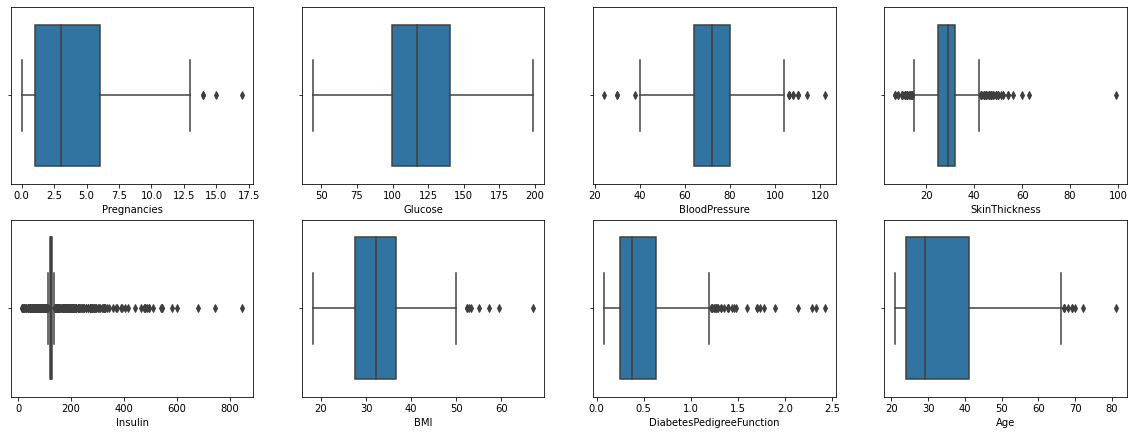

In [24]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sb.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sb.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sb.boxplot(data["SkinThickness"])


plt.subplot(4,4,5)
sb.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sb.boxplot(data["BMI"])

plt.subplot(4,4,7)
sb.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sb.boxplot(data["Age"])

plt.show()

In [25]:
data["Pregnancies"]=data["Pregnancies"].clip(lower=data["Pregnancies"].quantile(0.05),upper=data["Pregnancies"].quantile(0.95))
data["BloodPressure"]=data["BloodPressure"].clip(lower=data["BloodPressure"].quantile(0.05),upper=data["BloodPressure"].quantile(0.95))
data["SkinThickness"]=data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.07),upper=data["SkinThickness"].quantile(0.93))
data["Insulin"]=data["Insulin"].clip(lower=data["Insulin"].quantile(0.25),upper=data["Insulin"].quantile(0.75))
data["BMI"]=data["BMI"].clip(lower=data["BMI"].quantile(0.05),upper=data["BMI"].quantile(0.95))
data["DiabetesPedigreeFunction"]=data["DiabetesPedigreeFunction"].clip(lower=data["DiabetesPedigreeFunction"].quantile(0.05),upper=data["DiabetesPedigreeFunction"].quantile(0.95))
data["Age"]=data["Age"].clip(lower=data["Age"].quantile(0.05),upper=data["Age"].quantile(0.95))

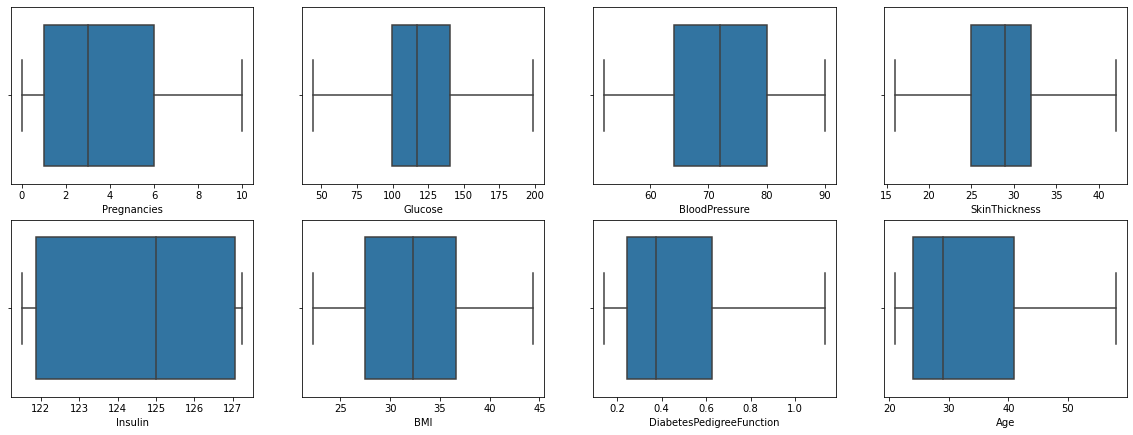

In [26]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sb.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sb.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sb.boxplot(data["SkinThickness"])


plt.subplot(4,4,5)
sb.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sb.boxplot(data["BMI"])

plt.subplot(4,4,7)
sb.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sb.boxplot(data["Age"])

plt.show()

In [27]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
x=pd.DataFrame(data,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
y=data.Outcome.values.reshape(-1,1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.00,33.6,0.62700,50.0
1,1.0,85.0,66.0,29.0,125.00,26.6,0.35100,31.0
2,8.0,183.0,64.0,29.0,125.00,23.3,0.67200,32.0
3,1.0,89.0,66.0,23.0,121.50,28.1,0.16700,21.0
4,0.0,137.0,52.0,35.0,127.25,43.1,1.13285,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.0,127.25,32.9,0.17100,58.0
764,2.0,122.0,70.0,27.0,125.00,36.8,0.34000,27.0
765,5.0,121.0,72.0,23.0,121.50,26.2,0.24500,30.0
766,1.0,126.0,60.0,29.0,125.00,30.1,0.34900,47.0


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
clf=RandomForestClassifier(n_estimators=150,max_depth=3)

clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [31]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7705627705627706


In [32]:
from sklearn import tree

In [33]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

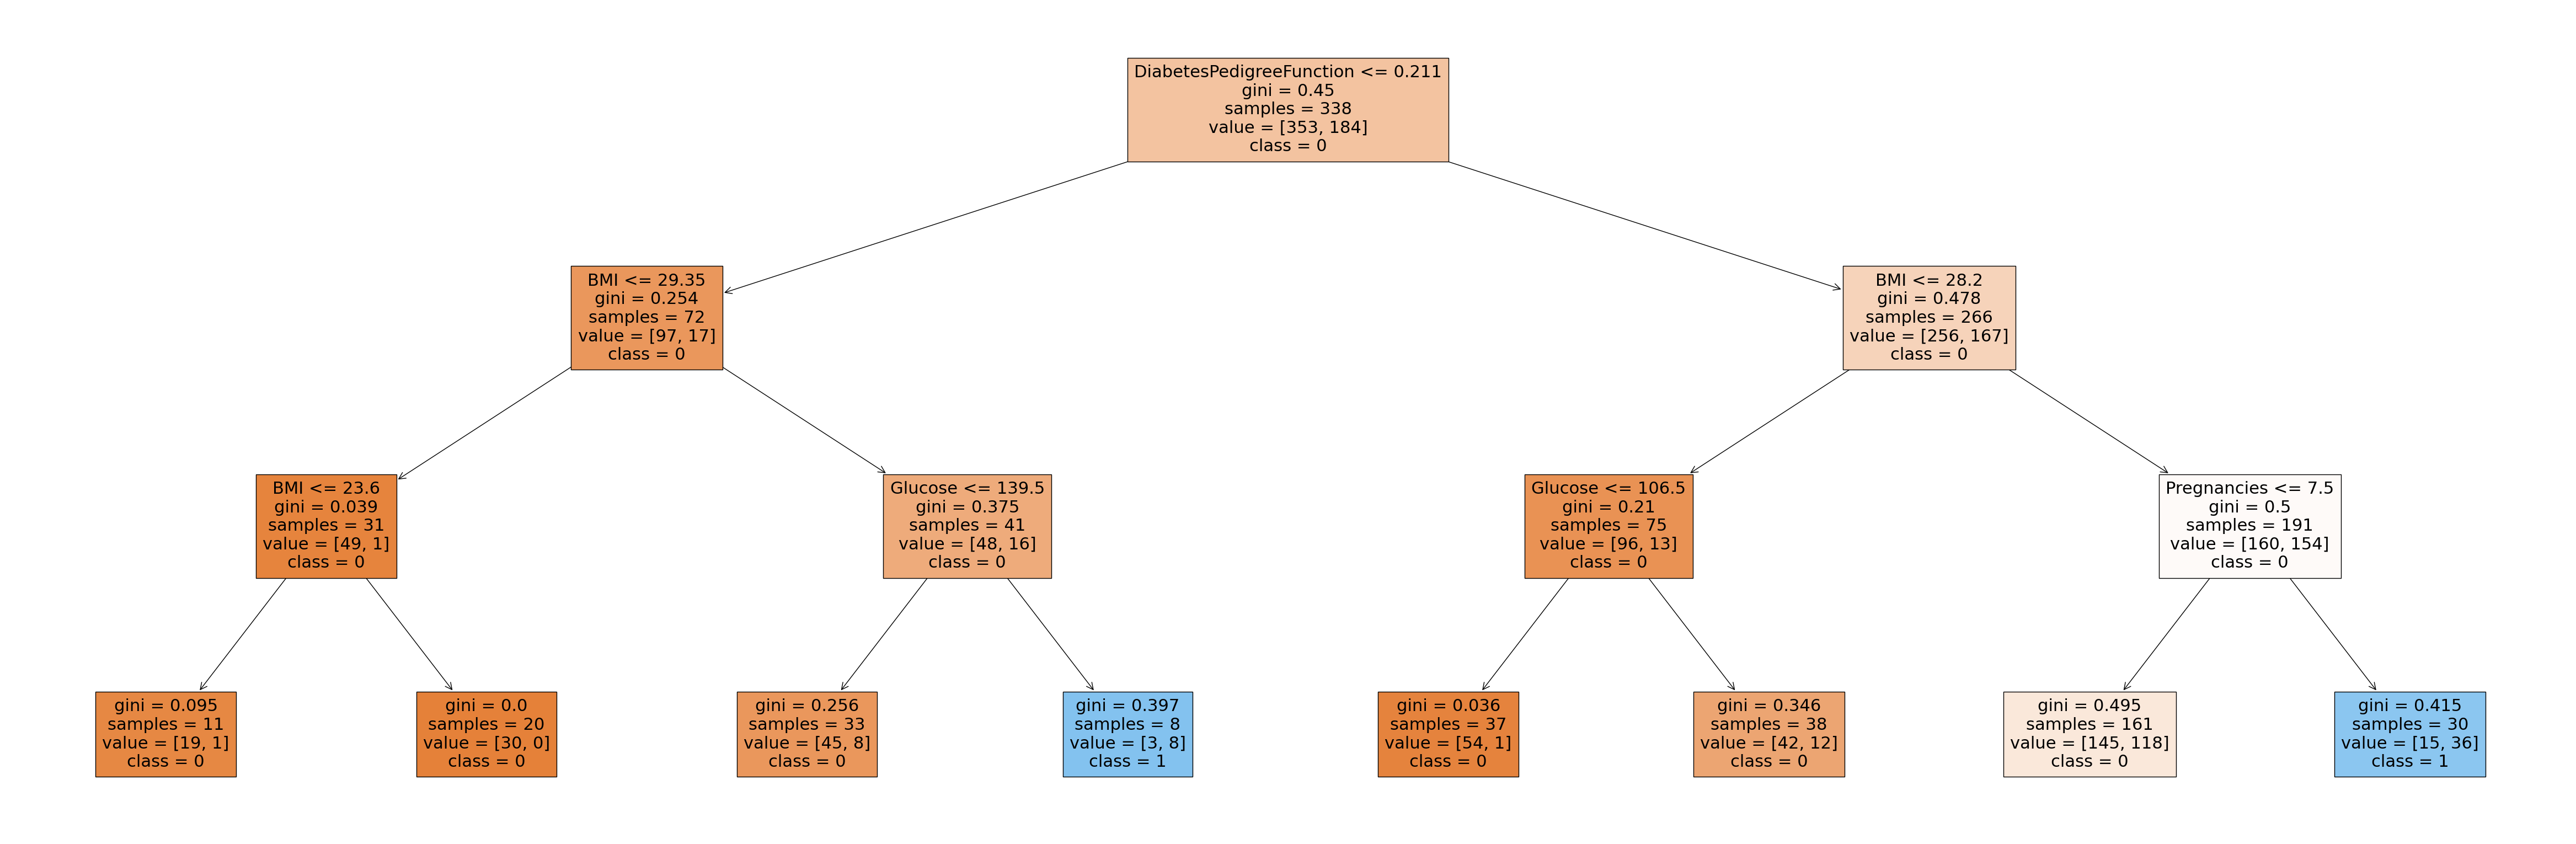

In [34]:
f_n=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
t_n=["0","1"]
fig=plt.figure(figsize=(60,20),dpi=100)
plot=tree.plot_tree(clf.estimators_[5],feature_names=f_n,class_names=t_n,filled=True)
fig.savefig("Tree1.png")

In [ ]:
model.save('diabetes.sav') 